In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


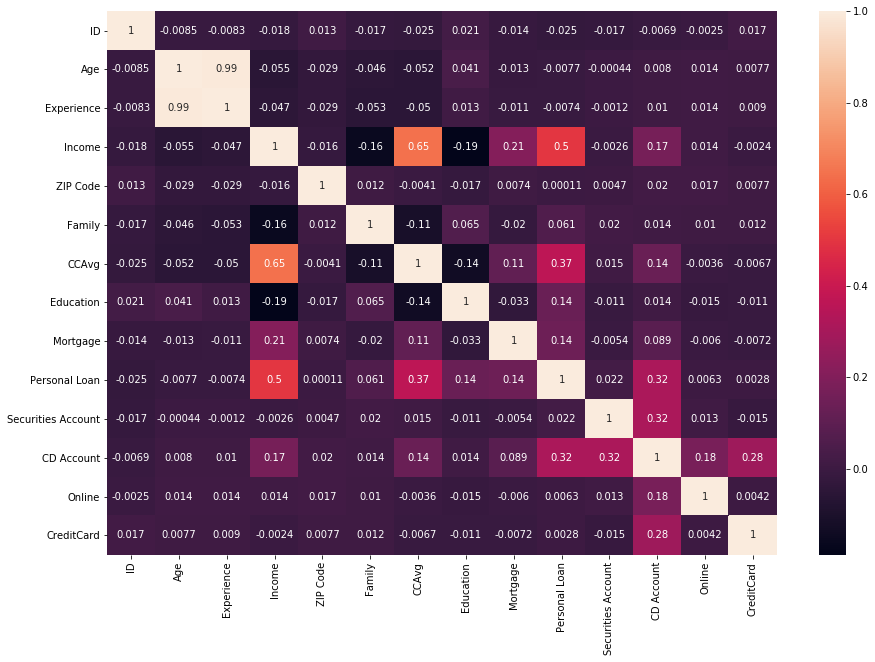

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

# X and Y Variables

In [7]:
X = df.drop(["Personal Loan","ID","ZIP Code"],axis=1)
Y = df["Personal Loan"]

In [8]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [9]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

# Train and Test Spliting

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

# Model Building Using Sklearn

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lm1 = LogisticRegression()

lm1.fit(x_train,y_train)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Score of Model (Using Test Data (ie. the Unseen Data))

In [13]:
lm1.score(x_test,y_test)

0.952

# Alternate Method Using StatsModel.api

In [14]:
import statsmodels.api as sm

In [15]:
x1= sm.add_constant(x_train)

logistic = sm.Logit(y_train,x1)

result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.130780
         Iterations 9


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:                  0.5992
Time:                        15:27:43   Log-Likelihood:                -457.73
converged:                       True   LL-Null:                       -1142.2
Covariance Type:            nonrobust   LLR p-value:                6.188e-287
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.1688      1.937     -5.767      0.000     -14.965      -7.373
Age                   -0.0934      0.072     -1.292      0.196      -0.235       0.048
Experience             0.0996      0.072      1.392      0.164      -0.041       0.240
Income                 0.0535      0.003     17.303      0.000       0.047       0.060
Family                 0.6412      0.087      7.368      0.000       0.471       0.812
CCAvg                  0.1857      0.048      3.874      0.000       0.092       0.280
Education              1.8320      0.139     13.224      0.000       1.560       2.103
Mortgage               0.0009      0.001      1.336      0.182      -0.000       0.002
Securities Account    -0.8386      0.327     -2.567      0.010      -1.479      -0.198
CD Account             3.7854      0.376     10.077      0.000       3.049       4.522
Online                -0.8492      0.187     -4.535      0.000      -1.216      -0.482
CreditCard            -1.0731      0.238     -4.511      0.000      -1.539      -0.607
======================================================================================
"""